In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,10

In [2]:
df = pd.read_csv("SeoulBikeData.csv", encoding='unicode_escape')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,y,X
0,254,-5.2
1,204,-5.5
2,173,-6.0
3,107,-6.2
4,78,-6.0
...,...,...
8755,1003,4.2
8756,764,3.4
8757,694,2.6
8758,712,2.1


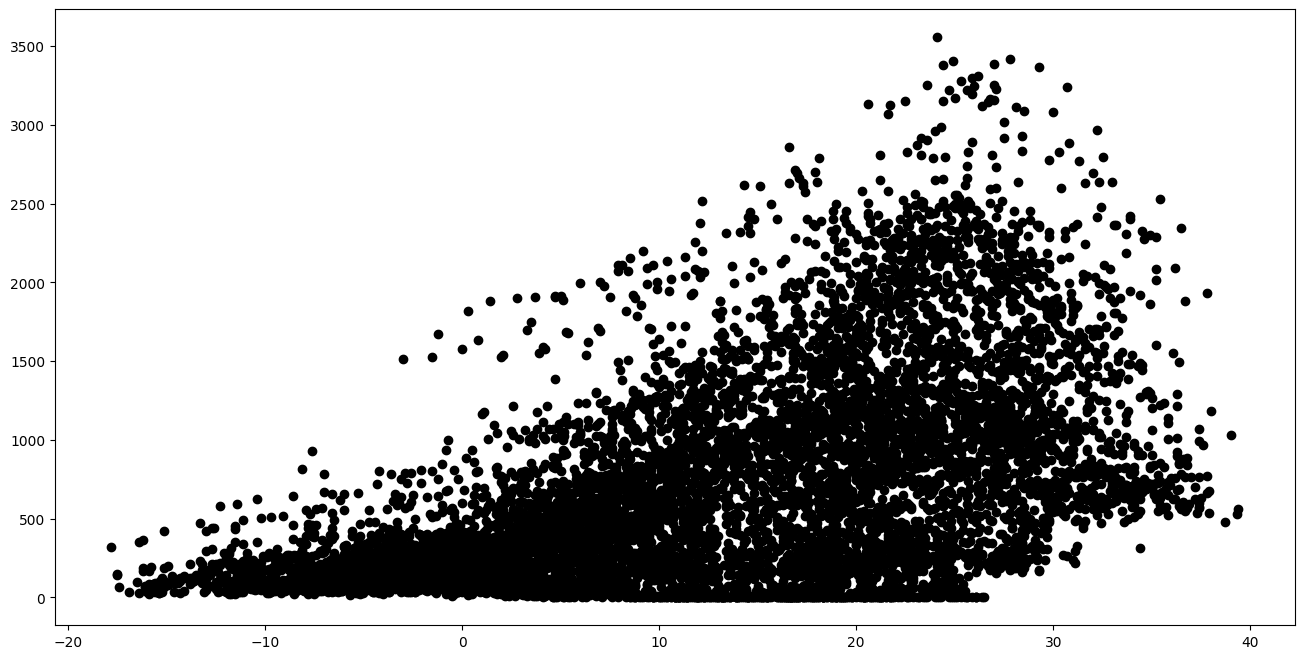

In [3]:
data = df[['Rented Bike Count', 'Temperature(°C)']].copy()
data.columns = ['y', 'X']
display(data)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['X'],
    data['y'],
    c='black'
)

In [4]:
for i in range(2,16):
    colname = 'X_{}'.format(i)
    data.loc[:, colname] = data['X']**i
print("Shape:", data.shape)
display(data.head())

Shape: (8760, 16)


,y,X,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,254,-5.2,27.04,-140.608,731.1616,-3802.04032,19770.609664,-102807.170253,5.345973e+05,-2.779906e+06,1.445551e+07,-7.516866e+07,3.908770e+08,-2.032560e+09,1.056931e+10,-5.496043e+10
1,204,-5.5,30.25,-166.375,915.0625,-5032.84375,27680.640625,-152243.523438,8.373394e+05,-4.605367e+06,2.532952e+07,-1.393123e+08,7.662179e+08,-4.214198e+09,2.317809e+10,-1.274795e+11
2,173,-6.0,36.00,-216.000,1296.0000,-7776.00000,46656.000000,-279936.000000,1.679616e+06,-1.007770e+07,6.046618e+07,-3.627971e+08,2.176782e+09,-1.306069e+10,7.836416e+10,-4.701850e+11
3,107,-6.2,38.44,-238.328,1477.6336,-9161.32832,56800.235584,-352161.460621,2.183401e+06,-1.353709e+07,8.392994e+07,-5.203656e+08,3.226267e+09,-2.000285e+10,1.240177e+11,-7.689097e+11
4,78,-6.0,36.00,-216.000,1296.0000,-7776.00000,46656.000000,-279936.000000,1.679616e+06,-1.007770e+07,6.046618e+07,-3.627971e+08,2.176782e+09,-1.306069e+10,7.836416e+10,-4.701850e+11


# Linear Regression
Tecnica statistica che cerca di modellare la relazione tra una variabile dipendente e una o più variabili indipendenti attraverso una relazione lineare. Questo è espressamente utile quando si desidera comprendere il comportamento di una variabile risposta in base a una o più variabili predittive.

**Codice:** Funzione che esegue una regressione lineare sul dataset _data_, consentendo al modello di avere un grado di polinomio specificato da _power_. La funzione restituisce il risultato della regressione lineare in un formato predefinito, inclusi l'**RSS** _(Residual Sum of Squares)_, l'**intercetta** e i **coefficienti dei predittori**. 

In [5]:
from sklearn.linear_model import LinearRegression
from math import sqrt
def linear_regression(data, power, models_to_plot):
    # Initialize predictors:
    predictors = ['X']
    if power >= 2:
        predictors.extend(['X_{}'.format(i) for i in range(2, power+1)])

    # Fit the model:
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[predictors])
    linreg = LinearRegression()
    linreg.fit(data_scaled, data['y'])
    y_pred = linreg.predict(data_scaled)

    #Check if a plot is to be made for the entered power:
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['X'], data['y'], '.')
        plt.plot(data['X'], y_pred)
        plt.title('Plot for power: {}'.format(power))

    #Return the result in pre-defined format:
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([sqrt(rss / len(data))])
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    
    return ret

In [6]:
col = ['rss', 'rmse', 'intercept'] + ['coeff_X_{}'.format(i) for i in range(1,16)]
ind = ['model_pow_{}'.format(i) for i in range(1,16)]
coeff_matrix_simple = pd.DataFrame(index=ind, columns=col)

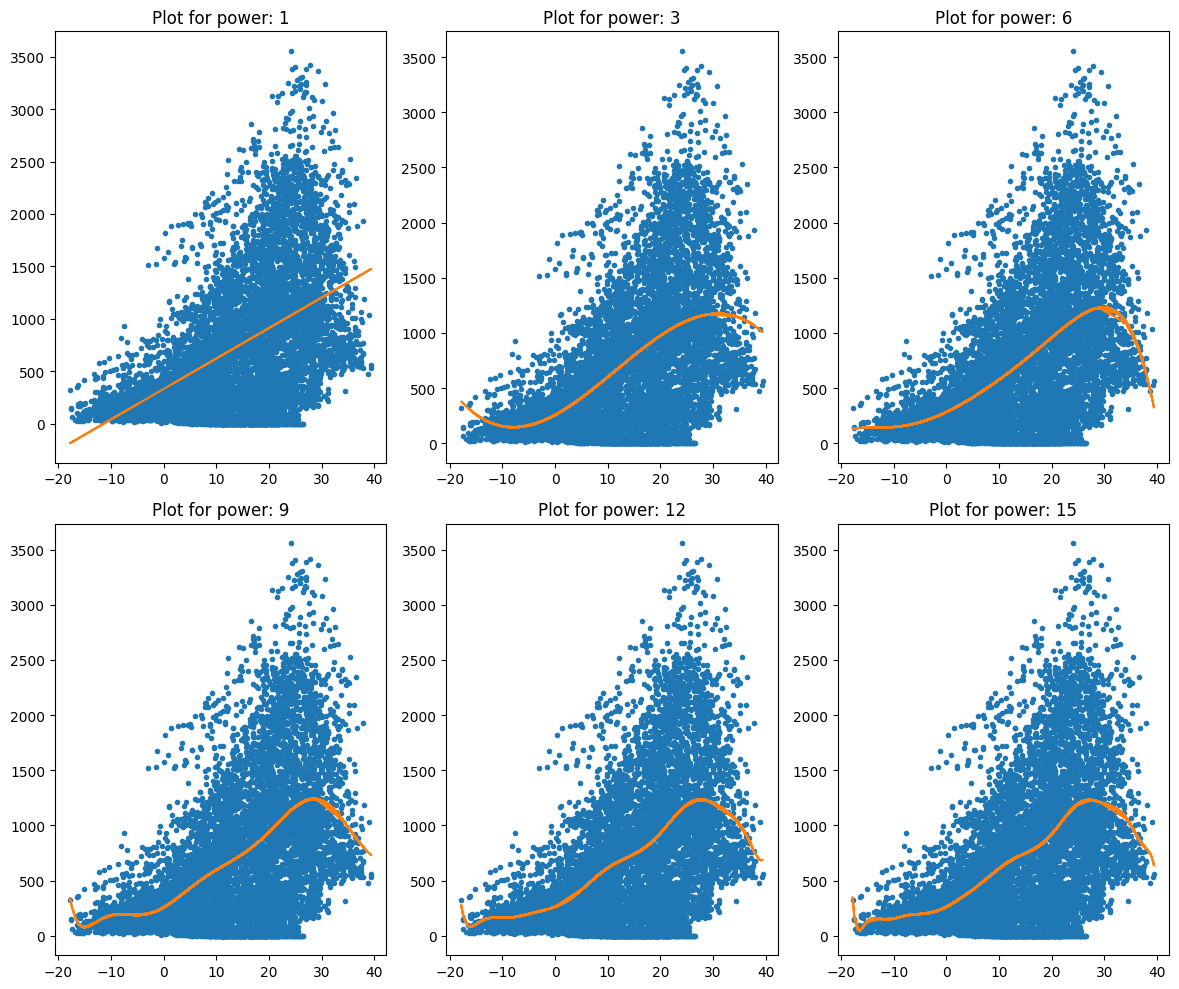

In [7]:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
for i in range(1,16):
    coeff_matrix_simple.iloc[i-1, 0:i+3] = linear_regression(data, i, models_to_plot)

In [8]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.5g}'.format
coeff_matrix_simple

,rss,rmse,intercept,coeff_X_1,coeff_X_2,coeff_X_3,coeff_X_4,coeff_X_5,coeff_X_6,coeff_X_7,coeff_X_8,coeff_X_9,coeff_X_10,coeff_X_11,coeff_X_12,coeff_X_13,coeff_X_14,coeff_X_15
model_pow_1,2.587e+09,543.44,704.6,347.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,2.5869e+09,543.42,704.6,339.35,9.0903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,2.5365e+09,538.1,704.6,308.02,385.24,-357.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,2.5239e+09,536.77,704.6,216.76,295.95,204.3,-404.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,2.5207e+09,536.42,704.6,268.27,148.95,-8.9628,371.34,-470.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,2.5202e+09,536.37,704.6,274.13,251.98,-191.8,19.811,404.31,-450.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,2.5176e+09,536.09,704.6,345.25,273.12,"-1,210.9","1,021.9","3,304.2","-5,842.6","2,424.7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,2.5156e+09,535.88,704.6,305.22,567.46,-845.59,"-2,232.1","5,013.3","2,635.9","-10,113","4,986.9",NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,2.5148e+09,535.79,704.6,332.72,777.98,"-1,685.1","-3,835.6","12,501","1,165.5","-28,409","27,529","-8,057.8",NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,2.5137e+09,535.68,704.6,273.25,872.69,-231.33,"-6,885.2","3,625.9","27,509","-26,326","-35,423","58,611","-21,713",NaN,NaN,NaN,NaN,NaN


# Ridge Regression
Tecnica di regressione lineare regolarizzata che aggiunge un termine di regolarizzazione L2 alla funzione obiettivo. Questo termine di regolarizzazione aiutà a ridurre la complessità del modello impedendo ai coefficienti dei predittori di diventare troppo grandi, prevenendo l'overfitting.

**Codice:** Funzione che implementa la regressione Ridge sul dataset _data_, utilizzando i predittori specificati. La variabile _alpha_ rappresenta il parametro di regolarizzazione, che controlla il grado di regolarizzazione applicato al modello. La funzione restituisce il risultato della regressione Ridge in un formato predefinito, incluso l'**RSS** _(Residual Sum of Squares)_, l'**intercetta** e i **coefficienti dei predittori**.

In [9]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot):
    #Fit the model
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[predictors])
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data_scaled, data['y'])
    y_pred = ridgereg.predict(data_scaled)

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['X'],data['y'],'.')
        plt.plot(data['X'],y_pred)
        plt.title('Plot for alpha: {}'.format(alpha))
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([sqrt(rss / len(data))])
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

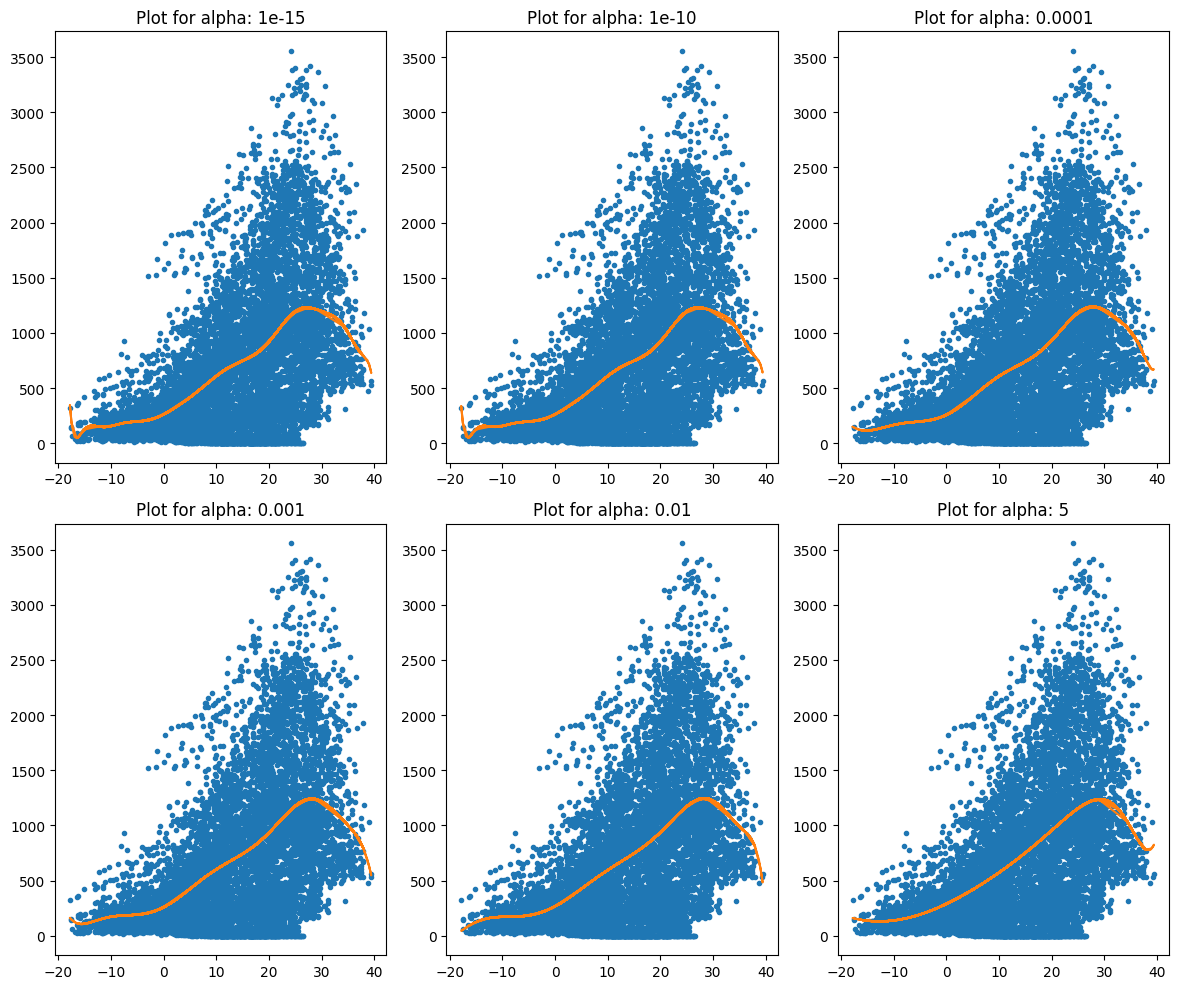

In [10]:
#Initialize predictors to be set of 15 powers of x
predictors=['X']
predictors.extend(['X_{}'.format(i) for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
#Initialize the dataframe for storing coefficients.
col = ['rss', 'rmse','intercept'] + ['coef_X_{}'.format(i) for i in range(1,16)]
ind = ['alpha_{}'.format(alpha_ridge[i]) for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [11]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.5g}'.format
coef_matrix_ridge

,rss,rmse,intercept,coef_X_1,coef_X_2,coef_X_3,coef_X_4,coef_X_5,coef_X_6,coef_X_7,coef_X_8,coef_X_9,coef_X_10,coef_X_11,coef_X_12,coef_X_13,coef_X_14,coef_X_15
alpha_1e-15,2.5122e+09,535.52,704.6,297.48,604.99,"-2,049.3",479.75,"42,180","-89,631",-3.2985e+05,1.0423e+06,6.1276e+05,-4.6525e+06,3.3277e+06,5.7043e+06,-1.1003e+07,6.9083e+06,-1.5616e+06
alpha_1e-10,2.5122e+09,535.52,704.6,294.51,596.78,"-1,878.9",531.73,"38,901","-86,393",-3.0436e+05,9.9128e+05,5.5036e+05,-4.3985e+06,3.1979e+06,5.3647e+06,-1.0434e+07,6.5671e+06,-1.4862e+06
alpha_1e-08,2.5125e+09,535.55,704.6,248.1,503.83,731.16,426.8,"-10,221","-28,363","67,788",1.8605e+05,-3.0651e+05,-5.5037e+05,1.0556e+06,3.9025e+05,-1.825e+06,1.3421e+06,-3.2284e+05
alpha_0.0001,2.5131e+09,535.61,704.6,270.37,807.1,-33.499,"-5,496.7",-190.43,"19,117",939.85,"-26,657","-9,237.3","10,609","20,765","9,461.3","-13,418","-21,838","15,216"
alpha_0.001,2.5137e+09,535.68,704.6,296.52,722.27,-643.69,"-4,066.3","3,970.8","10,259","-8,551.7","-6,716.8","-2,994.6","5,056.9","6,610.4","2,789.8","-4,163.8","-6,495.9","4,242.4"
alpha_0.01,2.5147e+09,535.78,704.6,307.77,530.22,-712.21,"-1,864.5","2,842.1","3,012.6","-2,637.5","-1,908.7","-1,844.1",519.24,"1,368.4","1,509.2",449.22,-599.89,-658.21
alpha_1,2.5178e+09,536.12,704.6,286.32,236.58,-265.5,-16.952,455.17,36.746,-103.18,-280.99,-233.44,-121.26,35.585,147.96,176.9,88.449,-128.26
alpha_5,2.5187e+09,536.21,704.6,272.59,206.24,-122.04,61.35,98.908,15.053,-49.043,-100.06,-101.2,-75.442,-31.989,10.537,41.144,51.029,35.976
alpha_10,2.5189e+09,536.24,704.6,266.13,198.82,-72.272,54.21,42.968,1.9842,-43.507,-72.945,-76.922,-61.974,-34.908,-4.532,22.682,41.922,50.423
alpha_20,2.5192e+09,536.27,704.6,259.89,190.97,-27.074,41.594,11.153,-12.177,-43.19,-59.139,-61.197,-50.237,-31.182,-8.2885,14.575,34.734,50.416


In [12]:
# determining the number of zeros in each row of the coefficients data set:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int32

# Lasso Regression
La regressione Lasso è una tecnica di regressione lineare regolarizzata che aggiunge un termine di regolarizzazione L1 alla funzione obiettivo. Questo termine di regolarizzazione aiuta a ridurre la complessità del modello e a selezionare automaticamente un sottoinsieme dei predittori più rilevanti, ponendo i coefficienti dei predittori meno importanti a zero.

**Codice:** Funzione che implementa la regressione Lasso su un dataset _data_, utilizzando i predittori specificati. La variabile _alpha_ rappresenta il parametro di regolarizzazione, che controlla il grado di regolarizzazione applicato al modello. La funzione restituisce il risultato della regressione Lasso in formato predefinito, inclusi l'**RSS** _(Residual Sum of Squares)_, l'**intercetta** e i **coefficienti dei predittori**.

In [13]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[predictors])
    lassoreg = Lasso(alpha=alpha, max_iter=100000)
    lassoreg.fit(data_scaled,data['y'])
    y_pred = lassoreg.predict(data_scaled)

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['X'],data['y'],'.')
        plt.plot(data['X'],y_pred)
        plt.title('Plot for alpha: {}'.format(alpha))

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([sqrt(rss / len(data))])
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\Users\lucar\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+09, tolerance: 3.644e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\lucar\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+09, tolerance: 3.644e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\lucar\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

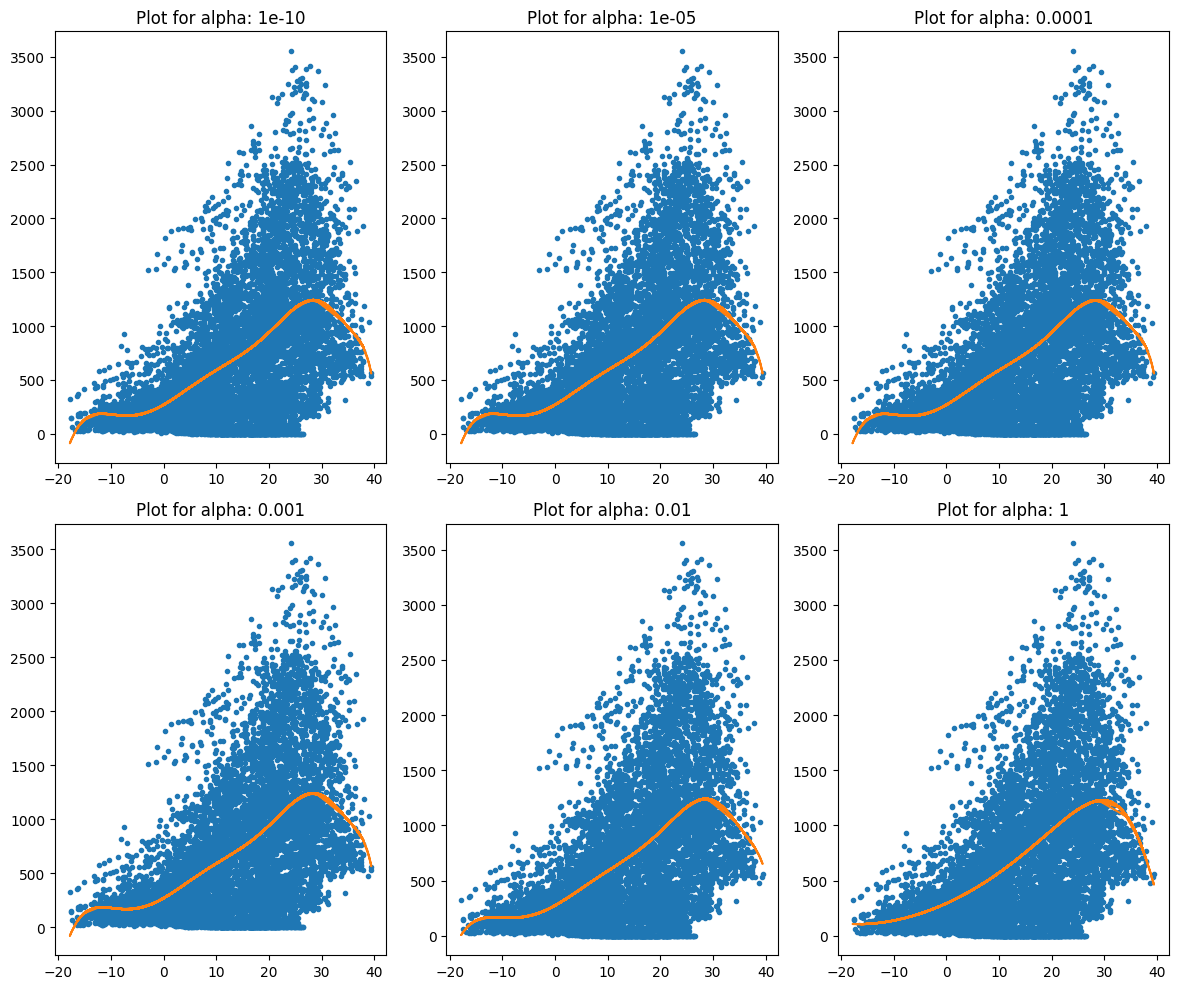

In [14]:
#Initialize predictors to all 15 powers of x
predictors=['X']
predictors.extend(['X_{}'.format(i) for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','rmse','intercept'] + ['coef_X_{}'.format(i) for i in range(1,16)]
ind = ['alpha_{}'.format(alpha_lasso[i]) for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [15]:
pd.options.display.float_format = '{:,.5g}'.format
coef_matrix_lasso

,rss,rmse,intercept,coef_X_1,coef_X_2,coef_X_3,coef_X_4,coef_X_5,coef_X_6,coef_X_7,coef_X_8,coef_X_9,coef_X_10,coef_X_11,coef_X_12,coef_X_13,coef_X_14,coef_X_15
alpha_1e-15,2.5155e+09,535.87,704.6,339.64,445.41,"-1,168.7",-633.74,"3,998.2","-1,326.1","-1,239.1","-1,036.9",-325.96,366.15,596.93,600.14,306.23,-81.749,-524.94
alpha_1e-10,2.5155e+09,535.87,704.6,339.64,445.41,"-1,168.7",-633.74,"3,998.2","-1,326.1","-1,239.1","-1,036.9",-325.96,366.15,596.93,600.14,306.23,-81.749,-524.94
alpha_1e-08,2.5155e+09,535.87,704.6,339.64,445.41,"-1,168.7",-633.74,"3,998.2","-1,326.1","-1,239.1","-1,036.9",-325.96,366.15,596.93,600.14,306.23,-81.748,-524.94
alpha_1e-05,2.5155e+09,535.87,704.6,339.62,445.37,"-1,168.4",-633.78,"3,996.9","-1,325","-1,238.8","-1,036.8",-325.43,364.67,597.18,600.19,306.01,-80.594,-525.59
alpha_0.0001,2.5155e+09,535.87,704.6,339.43,445.01,"-1,165.3",-634.14,"3,985","-1,314.7","-1,236.7","-1,036.1",-320.7,351.32,599.39,600.6,304.04,-70.134,-531.49
alpha_0.001,2.5155e+09,535.87,704.6,337.5,440.59,"-1,132.8",-633.72,"3,861.3","-1,215.7","-1,216","-1,028.1",-269.51,221.55,625.62,606.66,283.99,-0,-565.77
alpha_0.01,2.5157e+09,535.89,704.6,320,383.37,-833.57,-531.13,"2,716",-458.52,"-1,035.4","-1,023.1",-0,0,313.55,750.19,119.79,0,-406.04
alpha_1,2.5203e+09,536.38,704.6,259.09,195.24,-0,-0,-0,-0,-124.98,-34.771,-0,-0,-0,-0,0,0,12.828
alpha_5,2.5243e+09,536.8,704.6,273.35,143.9,0,-0,-0,-0,-0,-85.953,-27.633,-0,-0,-0,-0,-0,-0
alpha_10,2.5317e+09,537.6,704.6,286.27,101.06,0,-0,-0,-0,-0,-0,-6.7589,-78.562,-0,-0,-0,-0,-0


In [16]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      0
alpha_0.0001     0
alpha_0.001      1
alpha_0.01       3
alpha_1         10
alpha_5         11
alpha_10        11
dtype: int32

In [17]:
from sklearn.preprocessing import LabelEncoder

def one_hot_encoding(data, column):
    one_hot_encoded = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, one_hot_encoded], axis=1)
    data.drop(column, axis=1, inplace=True)
    
    label_encoder = LabelEncoder()
    for col in one_hot_encoded.columns:
        data[col] = label_encoder.fit_transform(data[col])
    return data

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

def print_confusion_matrix(y_test, pred):
    cmat = confusion_matrix(y_test, pred)
    print('TP - True Negative {}'.format(cmat[0,0]))
    print('FP - False Positive {}'.format(cmat[0,1]))
    print('FN - False Negative {}'.format(cmat[1,0]))
    print('TP - True Positive {}'.format(cmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def print_roc(knn, X_test, y_test):
    label_encoder = LabelEncoder()
    y_test_binary = label_encoder.fit_transform(y_test)
    y_scores = knn.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test_binary, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of kNN')
    plt.show()

# K-Nearest Neighbors (KNN)
Il K-Nearest Neighbors (KNN) è un algoritmo di classificazione che assegna un'etichetta a un punti di dati basandosi sulla maggioranza delle etichette dei suoi vicini più prossimi. Funziona calcolando la distanza tra il punto di dati da classificare e tutti gli altri punti di dati nel set di addestramento, quindi selezionando i k punti più vicini. L'etichetta assegnata al punto di dati è determinata dalla classe più comune tra i k vicini.

**Codice:** Funzione che implementa l'algoritmo KNN su un dataset fornito come parametro _data_. L'obiettivo è specificato tramite il parametro _target_. È possibile impostare il valore di _k_value_ per regolare il numero di vicini considerati durante la classificazione. All'interno della funzione, i dati vengono normalizzati, suddivisi in set di addestramento e test e quindi addestrati e testati con il modello KNN. La funzione restituisce le previsioni del modello KNN sui dati di test. Inoltre, vengono stampati i *report di classificazione*, la *matrice di confusione* e la *curva ROC* _(Receiver Operating Characteristic)_ per valutare le prestazioni del modello.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def knn_classification(data, target, k_value=1):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.drop(target, axis=1))
    
    X = pd.DataFrame(scaled_data, columns=[col for col in data.columns if col != target])
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    print(classification_report(y_test, pred))
    print_confusion_matrix(y_test, pred)
    print_roc(knn, X_test, y_test)
    
    return pred

In [21]:
data = one_hot_encoding(df, 'Seasons')
data = one_hot_encoding(data, 'Functioning Day')
data['day'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.day
data['month'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.month
data['year'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.year
data.drop('Date', axis=1, inplace=True)

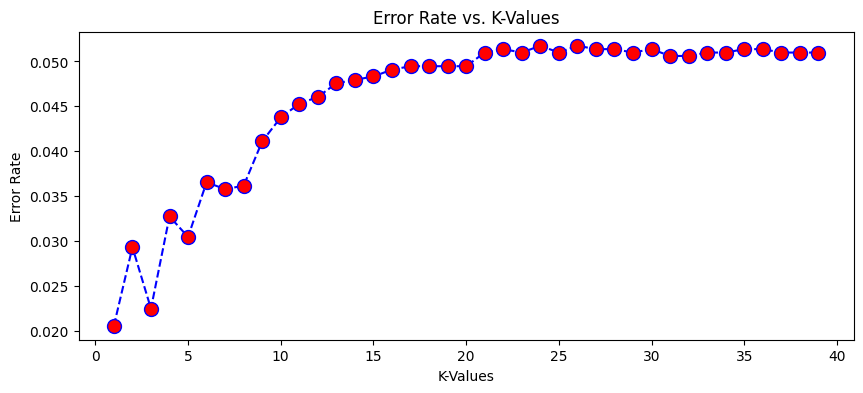

In [22]:
def print_error_rate(data, target):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.drop(target, axis=1))
    
    X = pd.DataFrame(scaled_data, columns=[col for col in data.columns if col != target])
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    error_rate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10,4))
    plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K-Values')
    plt.xlabel('K-Values')
    plt.ylabel('Error Rate')

print_error_rate(data, 'Holiday')

              precision    recall  f1-score   support

     Holiday       0.79      0.81      0.80       134
  No Holiday       0.99      0.99      0.99      2494

    accuracy                           0.98      2628
   macro avg       0.89      0.90      0.90      2628
weighted avg       0.98      0.98      0.98      2628

TP - True Negative 109
FP - False Positive 25
FN - False Negative 29
TP - True Positive 2465
Accuracy Rate: 0.9794520547945206
Misclassification Rate: 0.02054794520547945


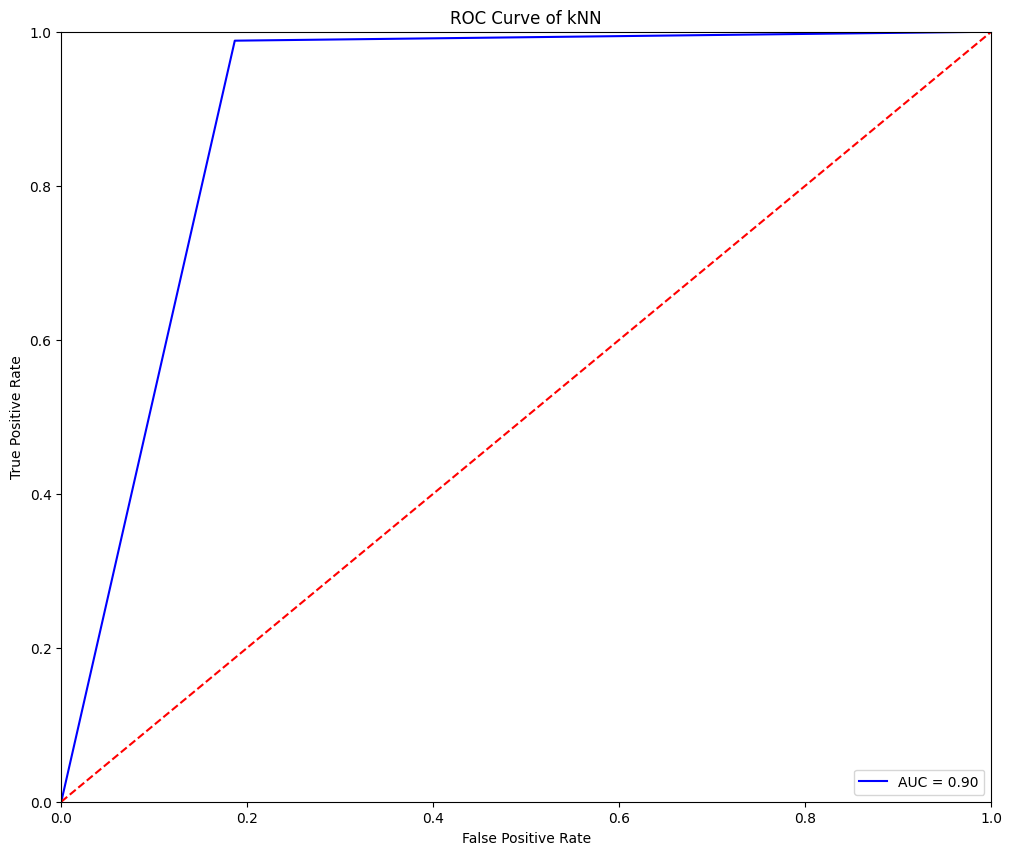

array(['No Holiday', 'No Holiday', 'No Holiday', ..., 'No Holiday',
       'No Holiday', 'No Holiday'], dtype=object)

In [27]:
knn_classification(data, 'Holiday')

# K-Means Clustering
Il K-Means Clustering è un algoritmo di apprendimento non supervisionato utilizzato per suddividere un insie,e di dati in gruppo o cluster basati sulle caratteristiche dei dati. L'obiettivo è di raggruppare punti di dati simili insieme e separare quelli diversi. L'algoritmo funziona in modo iterativo per assegnare punti di dati a cluster in modo che la somma dei quadrati delle distanze tra i punti dati e il centro del cluster più vicino sia minima. Ogni cluster è rappresentato da un centroide, che è il _centro_ del cluster, e i punti dati sono assegnati al cluster con il centroide più vicino.

**Codice:** Funzione che implementa l'algoritmo K-Means su un DataFrame fornito come parametro _dataframe_. L'utente specifica il numero di cluster _n_clusters_ da creare e le caratteristiche _feature1_ e _feature2_ del DataFrame da utilizzare per il clustering. È possibile specificare un seed per la riproducibilità dei risultati. La funzione calcola i centroidi dei cluster, assegna etichette di cluster ai punti di dati e visualizza il risultato del clustering utilizzando un diagramma a dispersione. Infine stampa informazioni utili come i _centroidi ottenuti_, le _etichette dei cluster_, la _somma dei quadrati delle distanze_ e il _numero di iterazioni_ effettuate durante l'esecuzione dell'algoritmo.

Numero di cluster: 1
Somma quadrati distanze: 3645184086.8082023
Numero di iterazioni: 2

Numero di cluster: 2
Somma quadrati distanze: 1074559764.6741028
Numero di iterazioni: 9

Numero di cluster: 3
Somma quadrati distanze: 465325388.76934034
Numero di iterazioni: 11

Numero di cluster: 4
Somma quadrati distanze: 281574008.82467645
Numero di iterazioni: 6

Numero di cluster: 5
Somma quadrati distanze: 193133141.10134208
Numero di iterazioni: 21

Numero di cluster: 6
Somma quadrati distanze: 147958429.13276693
Numero di iterazioni: 27

Numero di cluster: 7
Somma quadrati distanze: 104803846.23269033
Numero di iterazioni: 45

Numero di cluster: 8
Somma quadrati distanze: 81979175.12450704
Numero di iterazioni: 19

Numero di cluster: 9
Somma quadrati distanze: 64533444.12097801
Numero di iterazioni: 13

Numero di cluster: 10
Somma quadrati distanze: 50150490.19259895
Numero di iterazioni: 7



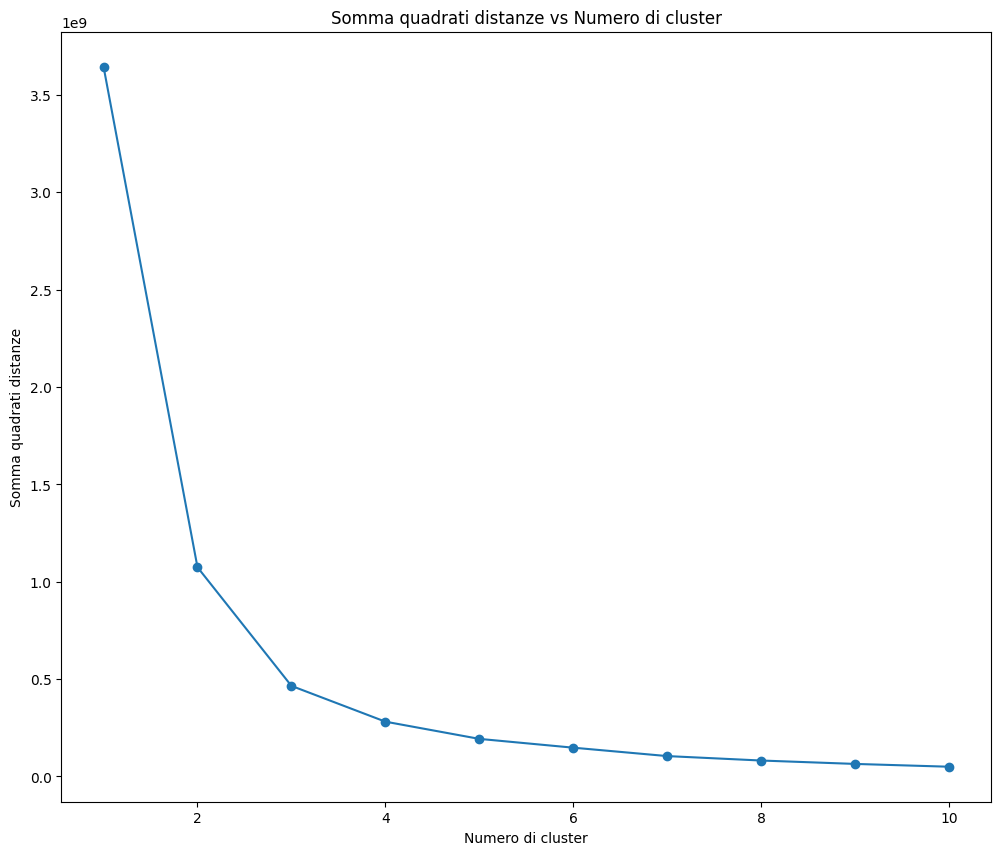

In [24]:
from sklearn.cluster import KMeans
def plot_cluster_evaluation(dataframe, max_clusters, feature1, feature2, seed=1234):
    data = dataframe[[feature1, feature2]].to_numpy()
    inertia_values = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)
        
        print('Numero di cluster:', n_clusters)
        print('Somma quadrati distanze:', kmeans.inertia_)
        print('Numero di iterazioni:', kmeans.n_iter_)
        print()
    
    # Plot della somma dei quadrati delle distanze rispetto al numero di cluster
    plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
    plt.xlabel('Numero di cluster')
    plt.ylabel('Somma quadrati distanze')
    plt.title('Somma quadrati distanze vs Numero di cluster')
    plt.show()

plot_cluster_evaluation(df, 10, 'Rented Bike Count', 'Temperature(°C)')

Centroidi ottenuti:
 [[ 253.47532189    5.72832618]
 [1253.07771261   20.41744868]
 [2336.40484429   23.8100346 ]
 [ 729.35305344   17.68711832]
 [1941.63615023   22.76384977]
 [ 478.41363636   11.59772727]
 [  71.31633207    5.08426479]
 [3028.80327869   25.52459016]
 [ 997.04282655   19.67119914]
 [1568.87134503   21.59805068]]
Labels:
 [0 0 0 ... 3 3 5]
Somma quadrati distanze: 50150490.193
Numero di iterazioni: 7


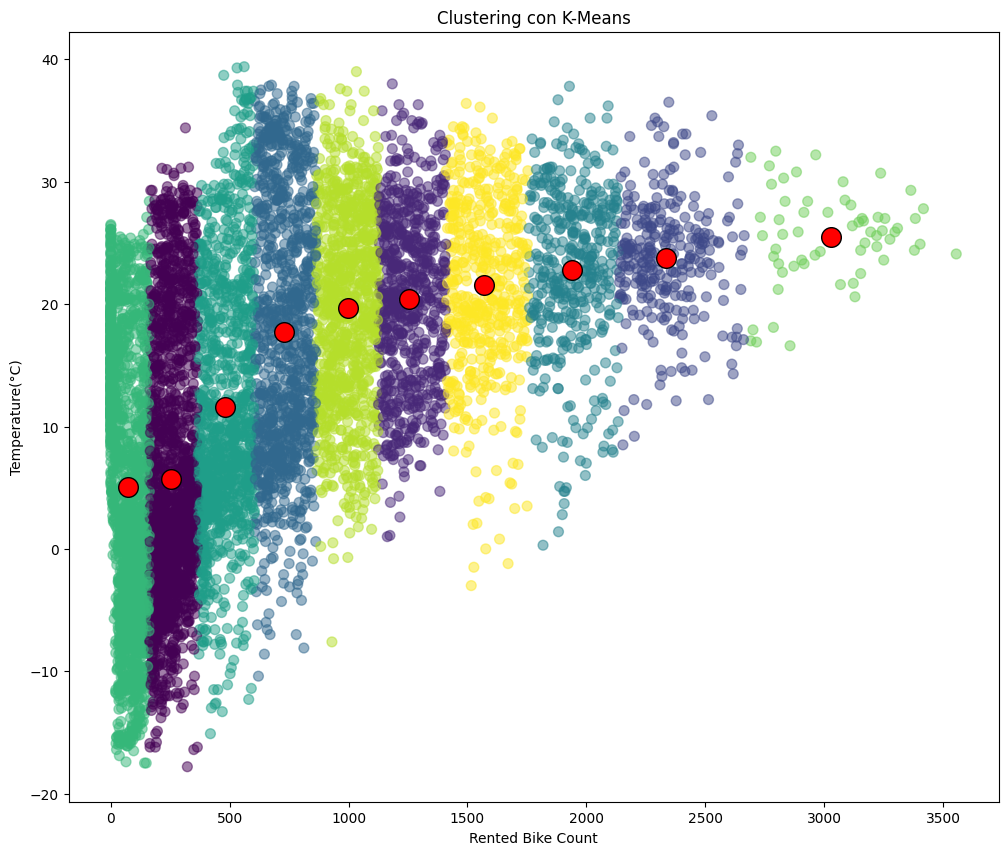

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
def k_means_clustering(dataframe, n_clusters, feature1, feature2, seed=1234):
    #seed = np.random.randint(0, 2147483647)
    data = dataframe[[feature1, feature2]].to_numpy()
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
    
    kmeans.fit(data)
    print('Centroidi ottenuti:\n', kmeans.cluster_centers_)
    print('Labels:\n', kmeans.labels_)
    print('Somma quadrati distanze: %0.3f' % kmeans.inertia_)
    print('Numero di iterazioni:', kmeans.n_iter_)
    
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='red', s=200, edgecolors='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Clustering con K-Means')
    plt.show()

k_means_clustering(df, 10, 'Rented Bike Count', 'Temperature(°C)')